In [11]:
from pulser import Pulse, Register, Sequence, Simulation
from pulser.waveforms import BlackmanWaveform, RampWaveform,  BlackmanWaveform, RampWaveform, CompositeWaveform, ConstantWaveform
from pulser.devices import MockDevice

import numpy as np
import qutip
import matplotlib.pyplot as plt

import random

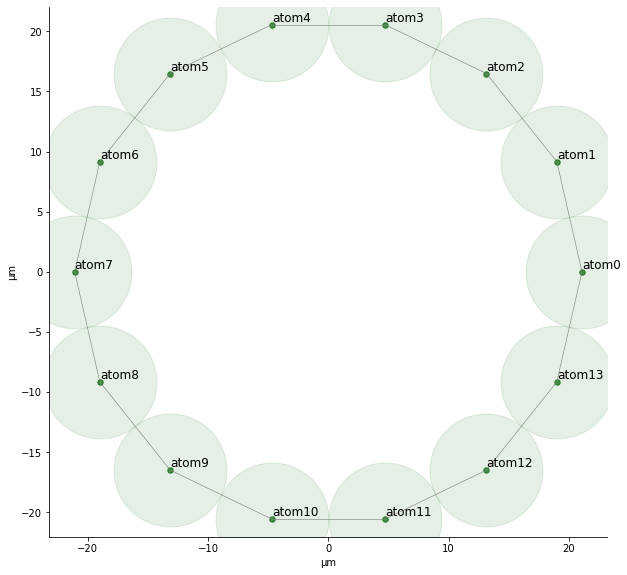

In [2]:
# Setup
L = 14

Omega_max = 2.3 * 2*np.pi 
U = Omega_max / 2.3

delta_0 = -3 * U
delta_f = 1 * U

t_rise = 2000
t_fall = 2000
t_sweep = (delta_f - delta_0)/(2 * np.pi * 10) * 5000

# Define a ring of atoms distanced by a blockade radius distance:
R_interatomic = MockDevice.rydberg_blockade_radius(U)
coords = R_interatomic/(2*np.tan(np.pi/L)) * np.array([(np.cos(theta*2*np.pi/L), np.sin(theta*2*np.pi/L)) for theta in range(L)])
                                  
reg = Register.from_coordinates(coords, prefix='atom')

reg.draw(blockade_radius=R_interatomic, draw_half_radius=True, draw_graph = True)

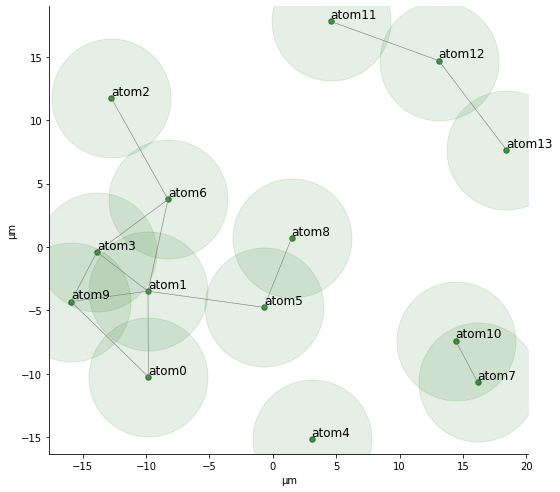

In [24]:
# Setup
L = 14

Omega_max = 2.3 * 2*np.pi 
U = Omega_max / 2.3

delta_0 = -3 * U
delta_f = 1 * U

t_rise = 2000
t_fall = 2000
t_sweep = (delta_f - delta_0)/(2 * np.pi * 10) * 5000

# Define a ring of atoms distanced by a blockade radius distance:
R_interatomic = MockDevice.rydberg_blockade_radius(U)
coords = R_interatomic/(2*np.tan(np.pi/L)) * np.array([(np.cos(theta*2*np.pi/L), np.sin(theta*2*np.pi/L)) for theta in range(L)])

coords = R_interatomic * 4 * np.array([np.random.rand(2) for theta in range(L)])
                                  
reg = Register.from_coordinates(coords, prefix='atom')

reg.draw(blockade_radius=R_interatomic, draw_half_radius=True, draw_graph = True)

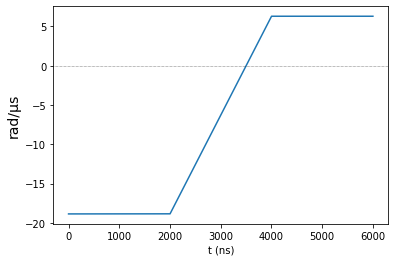

det : 6000


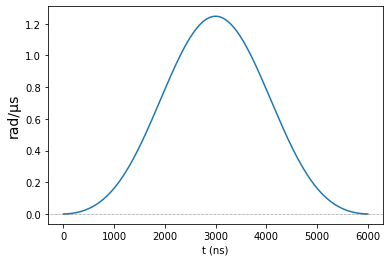

amp : 6000


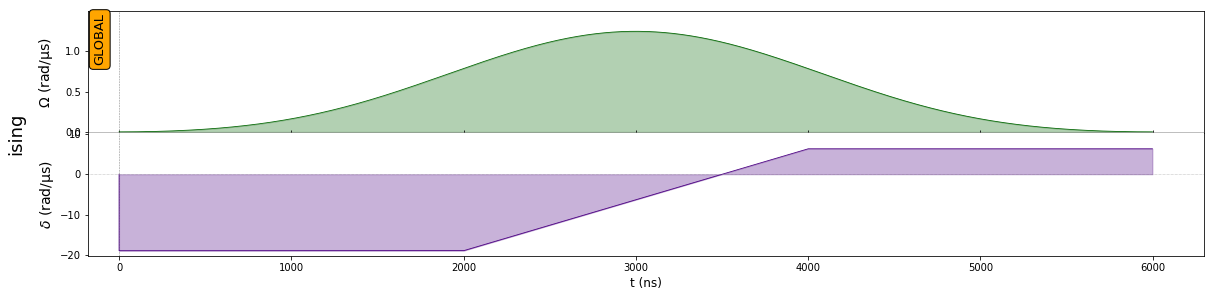

In [25]:
det_wf = CompositeWaveform(ConstantWaveform(t_sweep,delta_0),
                           RampWaveform(t_sweep, delta_0, delta_f),
                           ConstantWaveform(t_sweep,delta_f))
amp_wf = BlackmanWaveform(3*t_sweep, np.pi)

det_wf.draw()
print("det :", det_wf.duration)

amp_wf.draw()
print("amp :", amp_wf.duration)

rise = Pulse(amp_wf, det_wf, np.pi/2)

 
#rise = Pulse.ConstantDetuning(RampWaveform(t_rise, 0., Omega_max), delta_0, 0.)
sweep1 = Pulse.ConstantAmplitude(Omega_max, RampWaveform(t_sweep, delta_0, delta_f), 0.)
sweep2 = Pulse.ConstantAmplitude(Omega_max, RampWaveform(t_sweep, delta_f, delta_0), 0.)
fall = Pulse.ConstantDetuning(RampWaveform(t_fall, Omega_max, 0.), delta_f, 0.)

seq = Sequence(reg, MockDevice)
seq.declare_channel('ising', 'rydberg_global')

seq.add(rise, 'ising')
#seq.add(sweep1, 'ising')
#seq.add(sweep2, 'ising')
#seq.add(sweep1, 'ising')
#seq.add(sweep2, 'ising')
#seq.add(sweep1, 'ising')
#seq.add(fall, 'ising')


seq.draw()

In [27]:

#results2 = my_sim2.run(progress_bar=True)

#my_sim3 = Simulation(seq, sampling_rate=0.005)
#samples_3 = my_sim3.samples['Global']['ground-rydberg']['amp']

#results3 = my_sim3.run(progress_bar=True)

my_sim4 = Simulation(seq, sampling_rate=0.1)
samples_4 = my_sim4.samples['Global']['ground-rydberg']['amp']

results4 = my_sim4.run(progress_bar=True)

10.0%. Run time:   2.52s. Est. time left: 00:00:00:22
20.0%. Run time:   5.77s. Est. time left: 00:00:00:23
30.0%. Run time:   8.84s. Est. time left: 00:00:00:20
40.0%. Run time:  11.76s. Est. time left: 00:00:00:17
50.0%. Run time:  14.63s. Est. time left: 00:00:00:14
60.0%. Run time:  17.00s. Est. time left: 00:00:00:11
70.0%. Run time:  19.28s. Est. time left: 00:00:00:08
80.0%. Run time:  21.88s. Est. time left: 00:00:00:05
90.0%. Run time:  24.46s. Est. time left: 00:00:00:02
Total run time:  31.54s


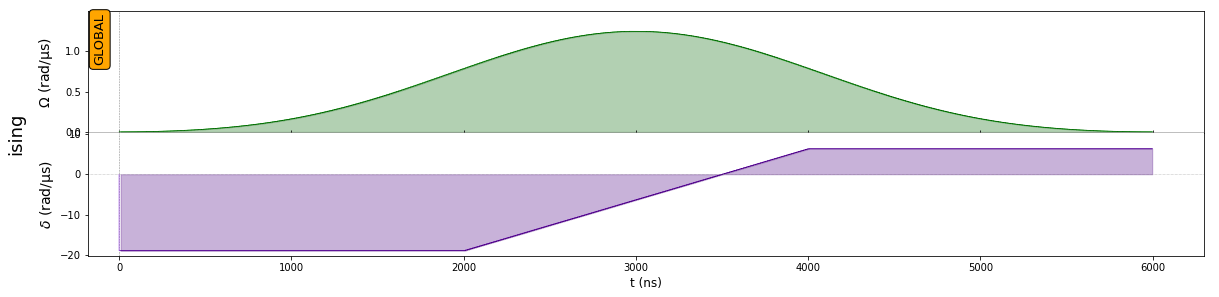

In [32]:
my_sim4.draw()

In [28]:
def random_initialstate(rmax=0.0):
    q = []
    for i in range(my_sim2._size):
        r = np.random.rand(2)
        r[1] = rmax*r[0]
        r[0] = np.sqrt(1- r[1]**2)

        q += [r[0]*np.exp(complex(0,2*np.pi*np.random.rand(1)))*my_sim2.basis['g'] \
        + r[1]*np.exp(complex(0,2*np.pi*np.random.rand(1)))*my_sim2.basis['r']]

    return qutip.tensor(q)

In [29]:
my_sim2 = Simulation(seq, sampling_rate=0.005)
samples_2 = my_sim2.samples['Global']['ground-rydberg']['amp']

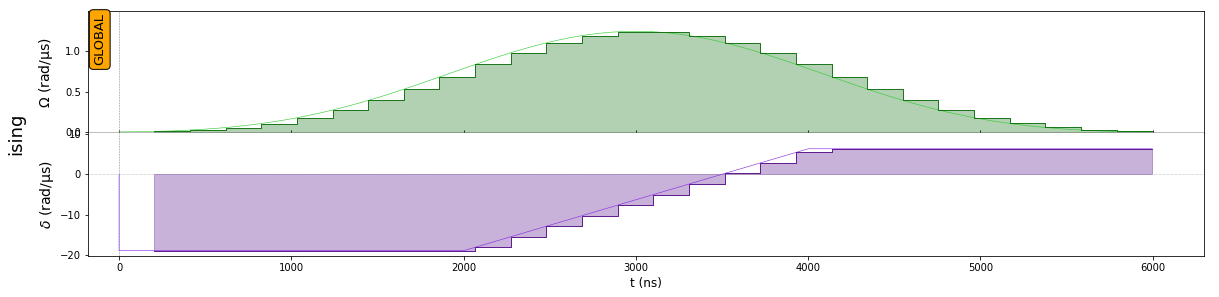

In [30]:
my_sim2.draw()

In [31]:
rmax = .05
results2_0 = my_sim2.run(initial_state=random_initialstate(rmax),progress_bar=True, nsteps = 300)
results2_1 = my_sim2.run(initial_state=random_initialstate(rmax),progress_bar=True, nsteps = 1000)
results2_2 = my_sim2.run(initial_state=random_initialstate(rmax),progress_bar=True, nsteps = 10000)
results2_3 = my_sim2.run(initial_state=random_initialstate(rmax),progress_bar=True, nsteps = 100000)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/integrate/_ode.py:1013: UserWarning: zvode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


Exception: ODE integration error: Try to increase the allowed number of substeps by increasing the nsteps parameter in the Options class.

In [9]:
expect_magnetization2_0 = results2_0.expect(magn_list)
expect_magnetization2_1 = results2_1.expect(magn_list)
expect_magnetization2_2 = results2_2.expect(magn_list)
expect_magnetization2_3 = results2_3.expect(magn_list)

for data in expect_magnetization2_0:
    plt.plot(my_sim2._times, data)
for data in expect_magnetization2_1:
    plt.plot(my_sim2._times, data)
for data in expect_magnetization2_2:
    plt.plot(my_sim2._times, data)
for data in expect_magnetization2_3:
    plt.plot(my_sim2._times, data)

NameError: name 'magn_list' is not defined

In [ ]:
my_sim4 = Simulation(seq, sampling_rate=0.1)
samples_4 = my_sim4.samples['Global']['ground-rydberg']['amp']

In [ ]:
rmax = .005
results4_0 = my_sim4.run(initial_state=random_initialstate(rmax),progress_bar=True, nsteps = 300)
results4_1 = my_sim4.run(initial_state=random_initialstate(rmax),progress_bar=True, nsteps = 1000)
results4_2 = my_sim4.run(initial_state=random_initialstate(rmax),progress_bar=True, nsteps = 10000)
results4_3 = my_sim4.run(initial_state=random_initialstate(rmax),progress_bar=True, nsteps = 100000)

In [ ]:
expect_magnetization4_0 = results4_0.expect(magn_list)
expect_magnetization4_1 = results4_1.expect(magn_list)
expect_magnetization4_2 = results4_2.expect(magn_list)
expect_magnetization4_3 = results4_3.expect(magn_list)

for data in expect_magnetization4_0:
    plt.plot(my_sim4._times, data)
for data in expect_magnetization4_1:
    plt.plot(my_sim4._times, data)
for data in expect_magnetization4_2:
    plt.plot(my_sim4._times, data)
for data in expect_magnetization4_3:
    plt.plot(my_sim4._times, data)

In [ ]:
my_sim3 = Simulation(seq, sampling_rate=0.1)
samples_3 = my_sim3.samples['Global']['ground-rydberg']['amp']

In [ ]:
results3_0 = my_sim3.run(initial_state=random_initialstate(0),progress_bar=True, nsteps = 1000)
results3_1 = my_sim3.run(initial_state=random_initialstate(.0001),progress_bar=True, nsteps = 1000)
results3_2 = my_sim3.run(initial_state=random_initialstate(.001),progress_bar=True, nsteps = 1000)
results3_3 = my_sim3.run(initial_state=random_initialstate(.005),progress_bar=True, nsteps = 1000)

In [ ]:
expect_magnetization3_0 = results3_0.expect(magn_list)
expect_magnetization3_1 = results3_1.expect(magn_list)
expect_magnetization3_2 = results3_2.expect(magn_list)
expect_magnetization3_3 = results3_3.expect(magn_list)

for data in expect_magnetization3_0:
    plt.plot(my_sim3._times, data)
for data in expect_magnetization3_1:
    plt.plot(my_sim3._times, data)
for data in expect_magnetization3_2:
    plt.plot(my_sim3._times, data)
for data in expect_magnetization3_3:
    plt.plot(my_sim3._times, data)

In [ ]:
my_sim2.draw()
my_sim3.draw()
my_sim4.draw()

In [ ]:
counts2 = results2.sample_final_state(meas_basis='ground-rydberg', N_samples=1000)
counts3 = results3.sample_final_state(meas_basis='ground-rydberg', N_samples=1000)
counts4 = results4.sample_final_state(meas_basis='ground-rydberg', N_samples=1000)

large_counts2 = {k:v for k,v in counts2.items() if v > 5}
large_counts3 = {k:v for k,v in counts3.items() if v > 5}
large_counts4 = {k:v for k,v in counts4.items() if v > 5}

plt.figure(figsize=(15,4))
plt.xticks(rotation=90, fontsize=14)
plt.title("Most frequent observations")
plt.bar(large_counts2.keys(), large_counts2.values())
plt.bar(large_counts3.keys(), large_counts3.values())
plt.bar(large_counts4.keys(), large_counts4.values())

In [ ]:
def magnetization(j, total_sites):
    prod = [qutip.qeye(2) for _ in range(total_sites)]
    prod[j] = qutip.sigmaz()
    return qutip.tensor(prod)

magn_list = [magnetization(j, L) for j in range(L)]

In [ ]:
expect_magnetization2 = results2.expect(magn_list)
expect_magnetization3 = results3.expect(magn_list)
expect_magnetization4 = results4.expect(magn_list)


for data in expect_magnetization2:
    plt.plot(my_sim2._times, data)

for data in expect_magnetization3:
    plt.plot(my_sim3._times, data)
    
for data in expect_magnetization4:
    plt.plot(my_sim4._times, data)

In [ ]:
options = qutip.Options()

In [ ]:
print(options)

In [ ]:
my_sim3 = Simulation(seq, sampling_rate=0.005)
samples_3 = my_sim3.samples['Global']['ground-rydberg']['amp']

In [ ]:
results_0 = my_sim3.run(initial_state=random_initialstate(0),progress_bar=True, nsteps = 1000, method='bdf')

In [ ]:
results_1 = my_sim3.run(initial_state=random_initialstate(0),progress_bar=True, nsteps = 1000, method='adams')

In [ ]:
expect_magnetization_0 = results_0.expect(magn_list)
expect_magnetization_1 = results_1.expect(magn_list)


for data in expect_magnetization_0:
    plt.plot(my_sim3._times, data)

for data in expect_magnetization_1:
    plt.plot(my_sim3._times, data)

In [ ]:
for data in expect_magnetization_1:
    plt.plot(my_sim3._times, data)

In [ ]:
expect_magnetization_0[1]

In [ ]:
len(data)

In [33]:
from qutip import *